Prepared by:

* Andrew Michelle Kalevela (222647)
* Collins Oduor (219858)
* Diana Achieng’ Otieno (222658)
* Wendy Oira (221007)

# Initial setup

### Loading libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import libpysal as ps
from geodatasets import get_path

import warnings

### Setting global options

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

warnings.filterwarnings("ignore")

### Loading data sets

In [3]:
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
geolocations_df = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
product_category_name_translations_df = pd.read_csv("data/product_category_name_translation.csv")

# Exploratory Analysis

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_df[["customer_zip_code_prefix", "customer_city"]].value_counts().sort_values(ascending=False)

customer_zip_code_prefix  customer_city 
22790                     rio de janeiro    142
24220                     niteroi           124
22793                     rio de janeiro    121
24230                     niteroi           117
22775                     rio de janeiro    110
                                           ... 
32419                     ibirite             1
32407                     ibirite             1
32250                     contagem            1
32150                     contagem            1
99990                     muliterno           1
Length: 15034, dtype: int64

In [6]:
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
product_category_name_translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
geolocations_df["geolocation_zip_code_prefix"].nunique(), customers_df["customer_zip_code_prefix"].nunique()

(19015, 14994)

In [15]:
customers_df.shape

(99441, 5)

In [16]:
geolocations_df.shape

(1000163, 5)

In [17]:
order_items_df.shape

(112650, 7)

In [18]:
order_payments_df.shape

(103886, 5)

In [19]:
order_reviews_df.shape

(99224, 7)

In [20]:
orders_df.shape

(99441, 8)

In [21]:
products_df.shape

(32951, 9)

In [22]:
sellers_df.shape

(3095, 4)

In [23]:
product_category_name_translations_df.shape

(71, 2)

# Transformation and Feature Engineering

In [24]:
order_order_payments = pd.merge(orders_df, order_payments_df, on="order_id", how="left")

In [25]:
order_order_payments.shape

(103887, 12)

In [26]:
order_order_payments.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [27]:
orders_df["order_id"].nunique(), order_order_payments["order_id"].nunique()

(99441, 99441)

In [28]:
order_order_payment_reviews = pd.merge(order_order_payments, order_reviews_df, on="order_id", how="left")

In [29]:
order_order_payment_reviews.shape

(104478, 18)

In [30]:
order_order_payment_reviews_items = pd.merge(order_order_payment_reviews, order_items_df, on="order_id", how="left")

In [31]:
order_order_payment_reviews_items.shape

(119143, 24)

In [32]:
products_clean = pd.merge(products_df, product_category_name_translations_df, on="product_category_name", how="left")

In [33]:
products_clean.shape

(32951, 10)

In [34]:
products_clean.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [35]:
order_order_payment_reviews_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [36]:
order_order_payment_reviews_items_with_product_names = pd.merge(order_order_payment_reviews_items, products_clean, on="product_id", how="left") 

In [37]:
order_order_payment_reviews_items_with_product_names.shape

(119143, 33)

In [38]:
geolocations_df["geolocation_zip_code_prefix"].value_counts().sort_values(ascending=False).head(20)

24220    1146
24230    1102
38400     965
35500     907
11680     879
22631     832
30140     810
11740     788
38408     773
28970     743
36400     733
39400     724
37701     714
35162     713
35900     709
37200     696
88330     694
22790     687
35700     678
36570     667
Name: geolocation_zip_code_prefix, dtype: int64

In [39]:
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [40]:
geolocations_with_unique_zip_code = geolocations_df.drop_duplicates(subset=["geolocation_zip_code_prefix"])

In [41]:
customers_with_geolocation = pd.merge(customers_df, geolocations_with_unique_zip_code, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")

In [42]:
customers_with_geolocation.shape

(99441, 10)

In [43]:
customers_df.shape, geolocations_df.shape

((99441, 5), (1000163, 5))

In [44]:
geolocations_df[(geolocations_df["geolocation_zip_code_prefix"] == 24220) & ~(geolocations_df["geolocation_city"].isin(["niteroi", "niterói"]))].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [45]:
order_order_payment_reviews_items_with_product_names.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [46]:
order_order_payment_reviews_items_with_product_names_and_sellers = pd.merge(order_order_payment_reviews_items_with_product_names, sellers_df, on="seller_id")

In [47]:
final_df = pd.merge(order_order_payment_reviews_items_with_product_names_and_sellers, customers_with_geolocation, on="customer_id")

In [48]:
final_df.shape

(118310, 45)

In [49]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1.0,credit_card,1.0,83.69,b8238c6515192f8129081e17dc57d169,5.0,NaN,"custo beneficio, simples de usar e rápido",2017-08-17 00:00:00,2017-08-21 12:43:27,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,baby,9350,maua,SP,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,8577.0,-23.482623,-46.374490,itaquaquecetuba,SP
4,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,2017-07-12 14:11:58,2017-07-12 14:30:18,2017-07-13 12:47:05,2017-07-18 16:24:42,2017-07-25 00:00:00,1.0,credit_card,2.0,52.77,fa5bf792d42ed25f80c54d18aeaa83de,4.0,NaN,NaN,2017-07-19 00:00:00,2017-07-24 13:59:59,1.0,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-18 14:30:18,44.99,7.78,cool_stuff,58.0,537.0,2.0,1850.0,34.0,5.0,34.0,cool_stuff,9350,maua,SP,bdd30e6e39cc70dde8665187b57af402,13820,jaguariuna,SP,13820.0,-22.689713,-46.982493,jaguariuna,SP


In [50]:
final_df[final_df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [51]:
final_df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category

In [52]:
timestamp_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "review_creation_date", "review_answer_timestamp", "shipping_limit_date"]

for column in timestamp_columns:
    final_df[column] = pd.to_datetime(final_df[column])

In [53]:
final_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                               

In [54]:
final_df.to_csv("olist_wide_data.csv", index=False)

In [55]:
final_df["order_date"] = final_df["order_purchase_timestamp"].dt.date
final_df["order_day"] = final_df["order_purchase_timestamp"].dt.day
final_df["order_month"] = final_df["order_purchase_timestamp"].dt.month
final_df["order_day"] = final_df["order_purchase_timestamp"].dt.dayofweek
final_df["order_year"] = final_df["order_purchase_timestamp"].dt.year
final_df["order_quarter"] = final_df["order_purchase_timestamp"].dt.quarter

In [56]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_date,order_day,order_month,order_year,order_quarter
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2017-10-02,0,10,2017,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2017-10-02,0,10,2017,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2017-10-02,0,10,2017,4
3,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,1.0,credit_card,1.0,83.69,b8238c6515192f8129081e17dc57d169,5.0,NaN,"custo beneficio, simples de usar e rápido",2017-08-17,2017-08-21 12:43:27,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,baby,9350,maua,SP,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,8577.0,-23.482623,-46.374490,itaquaquecetuba,SP,2017-08-10,3,8,2017,3
4,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,2017-07-12 14:11:58,2017-07-12 14:30:18,2017-07-13 12:47:05,2017-07-18 16:24:42,2017-07-25,1.0,credit_card,2.0,52.77,fa5bf792d42ed25f80c54d18aeaa83de,4.0,NaN,NaN,2017-07-19,2017-07-24 13:59:59,1.0,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-18 14:30:18,44.99,7.78,cool_stuff,58.0,537.0,2.0,1850.0,34.0,5.0,34.0,cool_stuff,9350,maua,SP,bdd30e6e39cc70dde8665187b57af402,13820,jaguariuna,SP,13820.0,-22.689713,-46.982493,jaguariuna,SP,2017-07-12,2,7,2017,3


In [57]:
final_df["order_year_month"] = final_df.apply(lambda x: f"{x['order_year']}-M{str(x['order_month']).zfill(2)}", axis=1)

In [58]:
final_df["order_year_quarter"] = final_df.apply(lambda x: f"{x['order_year']}-Q{str(x['order_quarter']).zfill(2)}", axis=1)

# Explanatory Analysis and Visualization

### How do order counts and revenue change over time (monthly/quarterly)? 

##### Trend of orders

In [59]:
daily_order_counts = final_df.groupby("order_date").size().reset_index(name="order_count")
monthly_order_counts = final_df.groupby("order_year_month").size().reset_index(name="order_count")
quarterly_order_counts = final_df.groupby("order_year_quarter").size().reset_index(name="order_count")

In [60]:
daily_order_counts.head()

,order_date,order_count
0,2016-09-04,2
1,2016-09-05,1
2,2016-09-15,3
3,2016-10-02,1
4,2016-10-03,8


In [61]:
monthly_order_counts.head()

,order_year_month,order_count
0,2016-M09,6
1,2016-M10,385
2,2016-M12,1
3,2017-M01,1023
4,2017-M02,2073


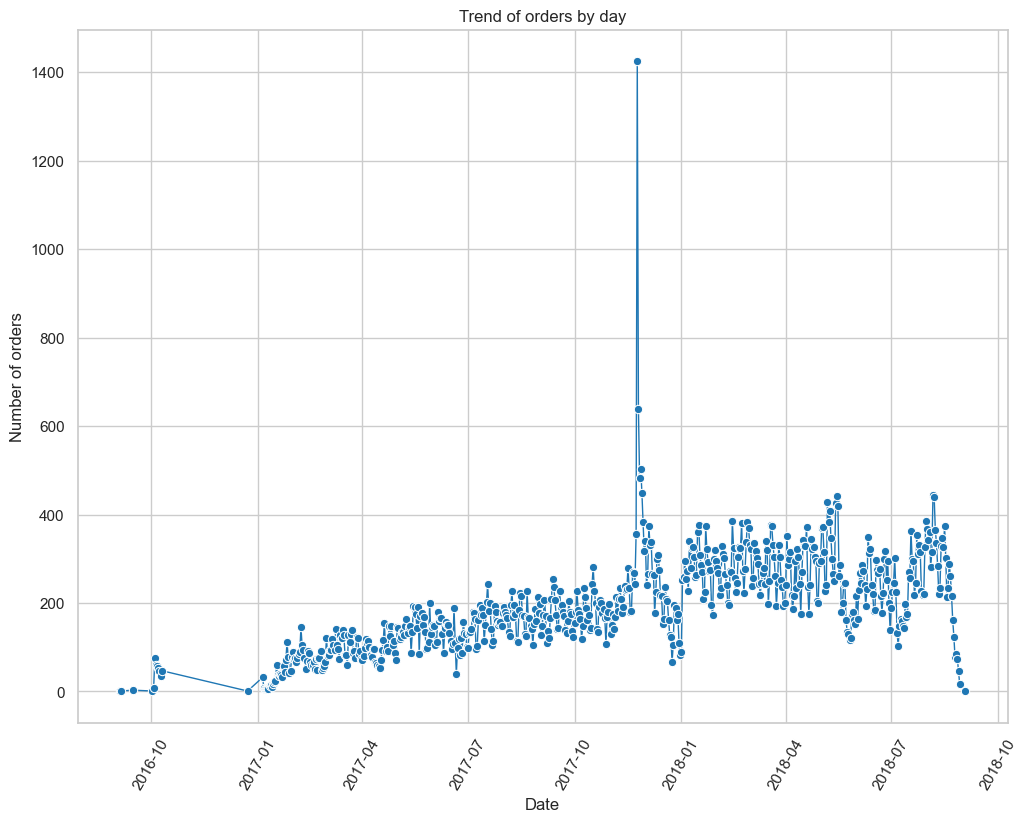

In [62]:
plt.figure(figsize=(12, 9))

axis = sns.lineplot(
    data=daily_order_counts, 
    x="order_date", 
    y="order_count", 
    marker='o', 
    linewidth=1.0,
    color="tab:blue"
)

plt.ylabel("Number of orders")
plt.xlabel("Date")
plt.title("Trend of orders by day")
plt.xticks(rotation=60)
plt.show()

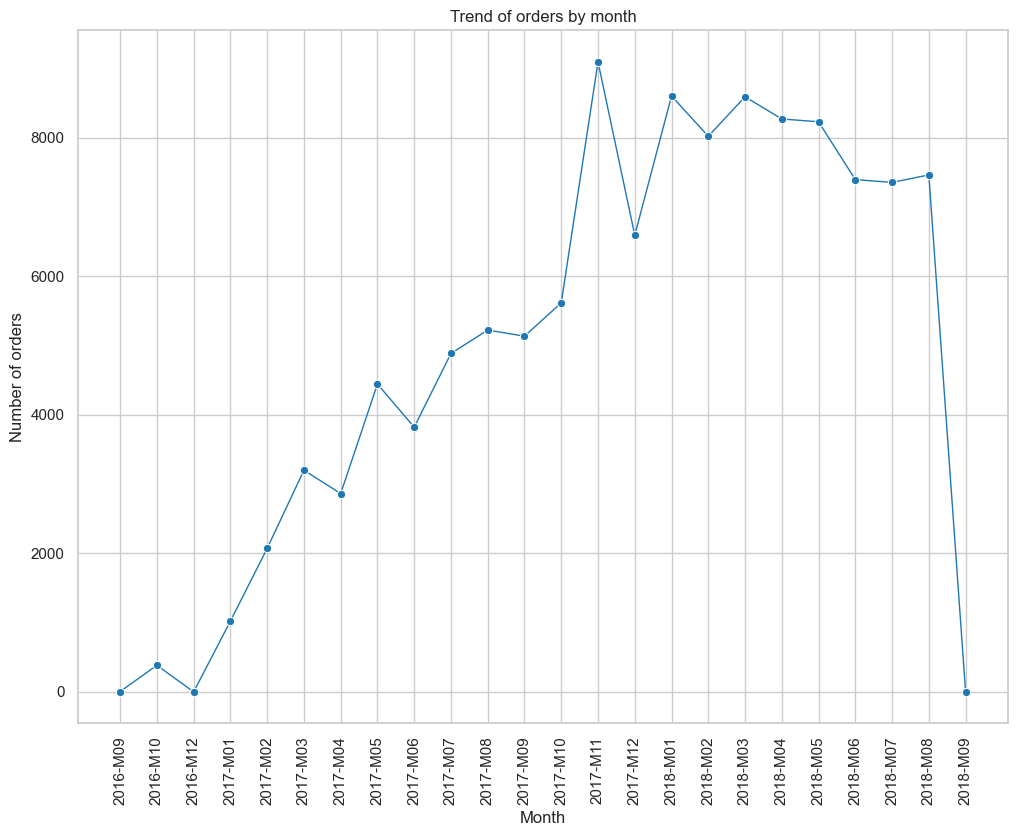

In [63]:
plt.figure(figsize=(12, 9))

axis = sns.lineplot(
    data=monthly_order_counts, 
    x="order_year_month", 
    y="order_count", 
    marker='o', 
    linewidth=1.0,
    color="tab:blue"
)

plt.ylabel("Number of orders")
plt.xlabel("Month")
plt.title("Trend of orders by month")
plt.xticks(rotation=90)
plt.show()

> The number of orders steadily increased from September 2016 until they peaked in November, 2017. The numbers then fluctuated until August 2018, and then finally dropped down. The sharp drop coincides with the latest period for which data is available.

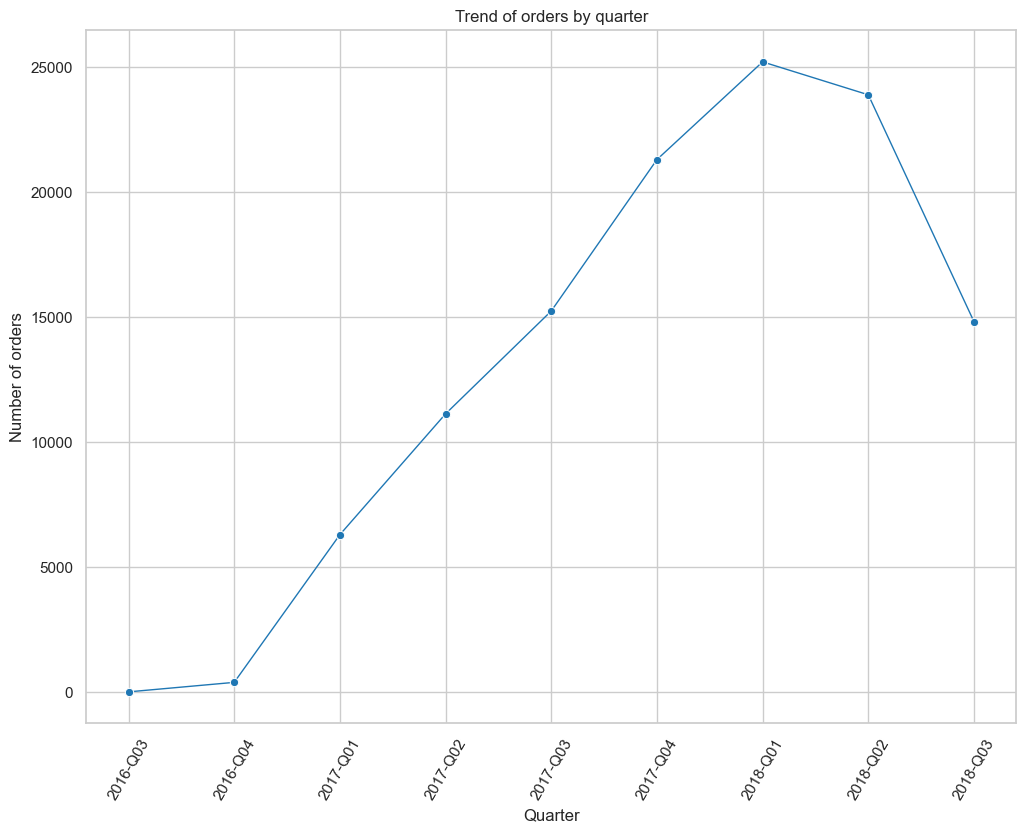

In [64]:
plt.figure(figsize=(12, 9))

axis = sns.lineplot(
    data=quarterly_order_counts, 
    x="order_year_quarter", 
    y="order_count", 
    marker='o', 
    linewidth=1.0,
    color="tab:blue"
)

plt.ylabel("Number of orders")
plt.xlabel("Quarter")
plt.title("Trend of orders by quarter")
plt.xticks(rotation=60)
plt.show()

> The number of orders peaked in Q1 of 2018 after rising for 6 consecutive quarters. The peak was then followed by a drop in the number of orders until Q3 of 2018 - the last period whose data was made available.

##### Trend of revenue

In [65]:
daily_revenue = final_df.groupby("order_date", as_index=False)["payment_value"].sum()
monthly_revenue = final_df.groupby("order_year_month", as_index=False)["payment_value"].sum()
quarterly_revenue = final_df.groupby("order_year_quarter", as_index=False)["payment_value"].sum()

In [66]:
daily_revenue.head()

,order_date,payment_value
0,2016-09-04,272.46
1,2016-09-05,75.06
2,2016-09-15,0.00
3,2016-10-02,109.34
4,2016-10-03,595.14


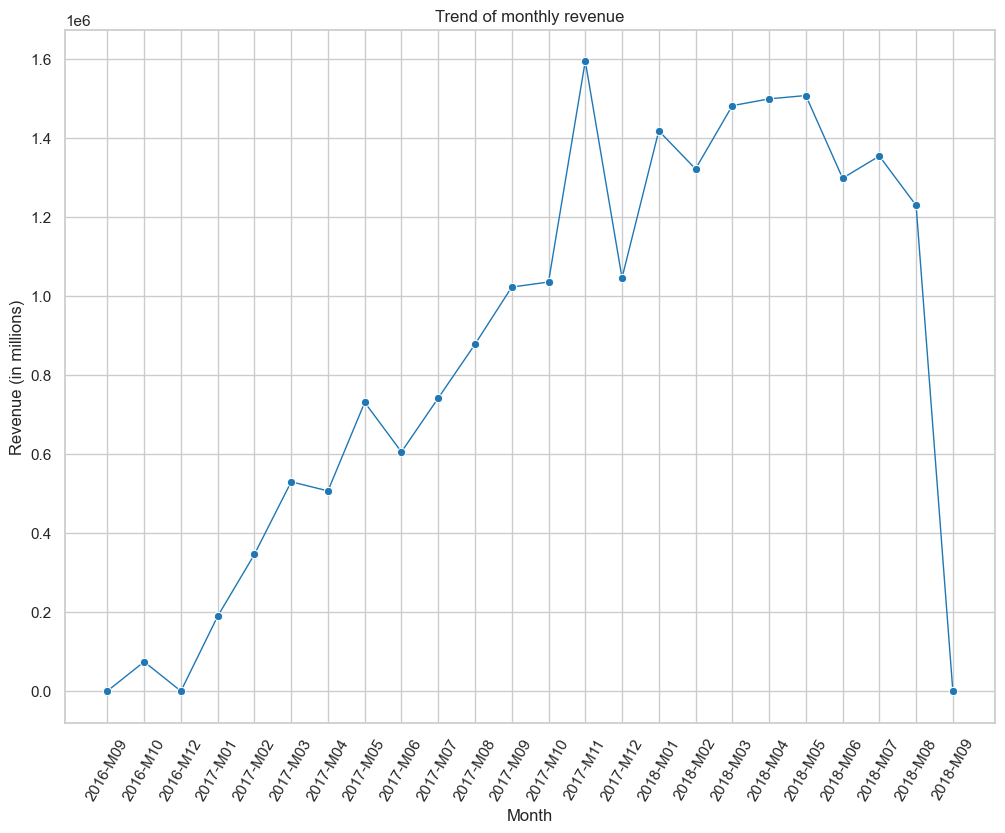

In [67]:
plt.figure(figsize=(12, 9))

axis = sns.lineplot(
    data=monthly_revenue, 
    x="order_year_month", 
    y="payment_value", 
    marker='o', 
    linewidth=1.0,
    color="tab:blue"
)

plt.ylabel("Revenue (in millions)")
plt.xlabel("Month")
plt.title("Trend of monthly revenue")
plt.xticks(rotation=60)
plt.show()

> The shape of the trend of revenue by month is similar to the shape defined by the trend of orders. The peak for revenues occurred in November, 2017 as was the case for orders.

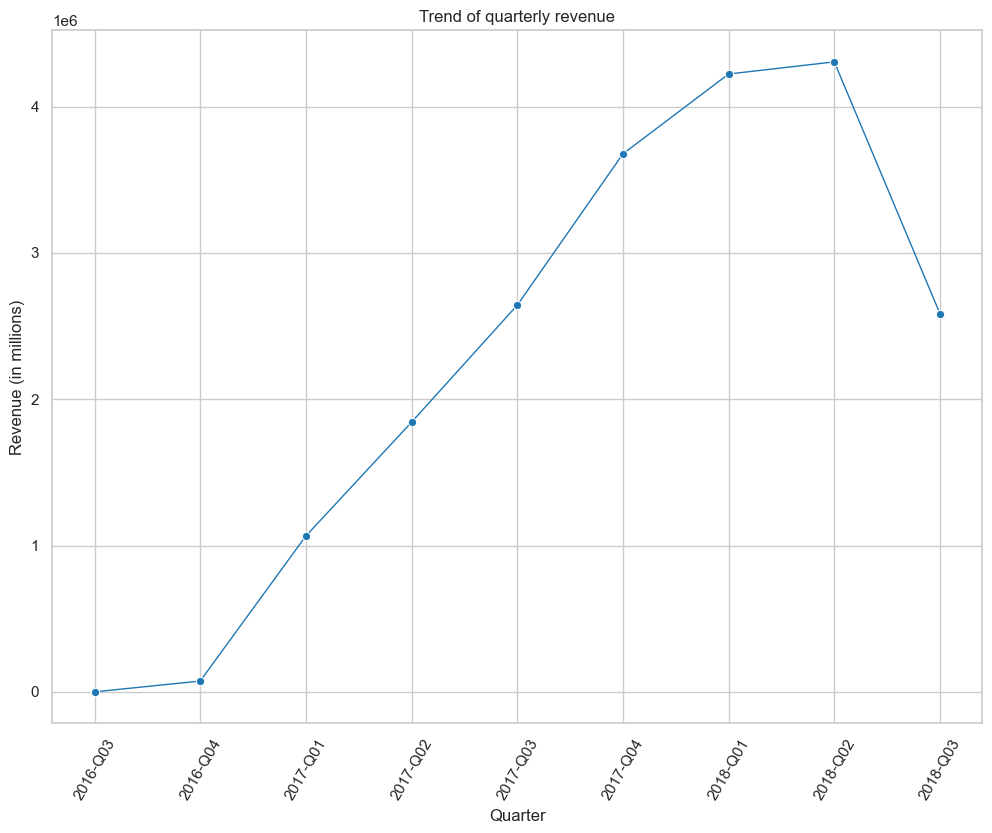

In [68]:
plt.figure(figsize=(12, 9))

axis = sns.lineplot(
    data=quarterly_revenue, 
    x="order_year_quarter", 
    y="payment_value", 
    marker='o', 
    linewidth=1.0,
    color="tab:blue"
)

plt.ylabel("Revenue (in millions)")
plt.xlabel("Quarter")
plt.title("Trend of quarterly revenue")
plt.xticks(rotation=60)
plt.show()

> Generally, the revenue increased from Q3 of 2016 in a sustained manner until Q2 2018; Q3 2018 witnessed the first drop in revenues in 7 quarters.

### What is the average delivery time and how does it vary by region/state/city?

In [69]:
final_df["delivery_time_in_days"] = (final_df["order_delivered_customer_date"] - final_df["order_purchase_timestamp"]).dt.days
final_df["delivery_time_in_seconds"] = final_df.apply(lambda x: x["delivery_time_in_days"]*86400 + (x["order_delivered_customer_date"] - x["order_purchase_timestamp"]).seconds, axis=1)

In [70]:
final_df[["order_delivered_customer_date", "order_purchase_timestamp", "delivery_time_in_days", "delivery_time_in_seconds", "customer_state", "seller_state"]].head()

,order_delivered_customer_date,order_purchase_timestamp,delivery_time_in_days,delivery_time_in_seconds,customer_state,seller_state
0,2017-10-10 21:25:13,2017-10-02 10:56:33,8.0,728920.0,SP,SP
1,2017-10-10 21:25:13,2017-10-02 10:56:33,8.0,728920.0,SP,SP
2,2017-10-10 21:25:13,2017-10-02 10:56:33,8.0,728920.0,SP,SP
3,2017-08-16 19:03:36,2017-08-10 13:35:55,6.0,538061.0,SP,SP
4,2017-07-18 16:24:42,2017-07-12 14:11:58,6.0,526364.0,SP,SP


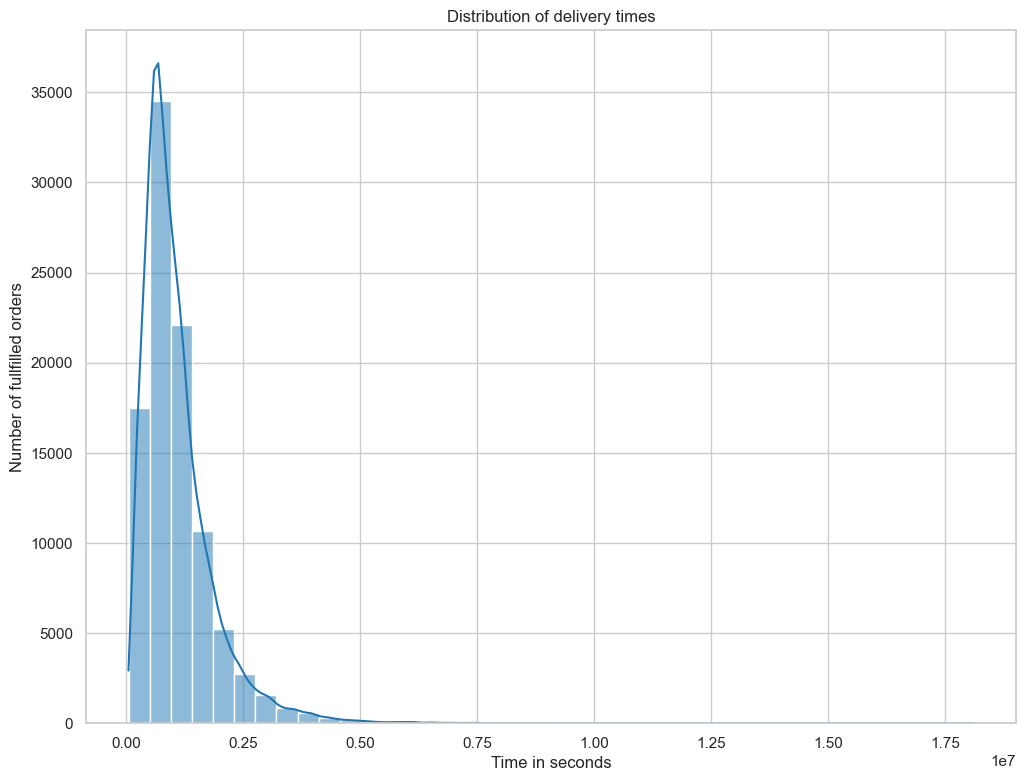

In [71]:
plt.figure(figsize=(12, 9))

axis = sns.histplot(final_df.drop_duplicates(subset=["order_id"]), x="delivery_time_in_seconds", kde=True, bins=40, color="tab:blue")

plt.ylabel("Number of fullfilled orders")
plt.xlabel("Time in seconds")
plt.title("Distribution of delivery times")
plt.show()

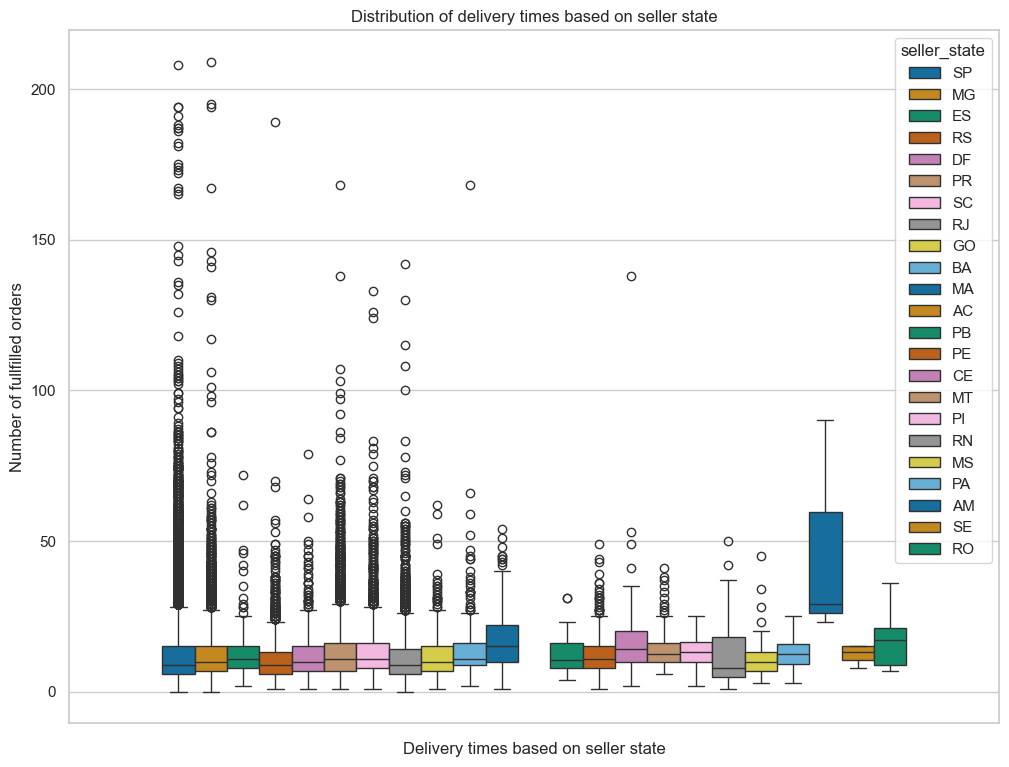

In [72]:
plt.figure(figsize=(12, 9))

axis = sns.boxplot(final_df.drop_duplicates(subset=["order_id"]), y="delivery_time_in_days", hue="seller_state", palette="colorblind")

plt.ylabel("Number of fullfilled orders")
plt.xlabel("Delivery times based on seller state")
plt.title("Distribution of delivery times based on seller state")
plt.show()

> From the sellers' perspective, the AM state has a higher median delivery time than all the other states. SP, on the other hand, has a longer right tail than other states - this signals that it has many delays. 

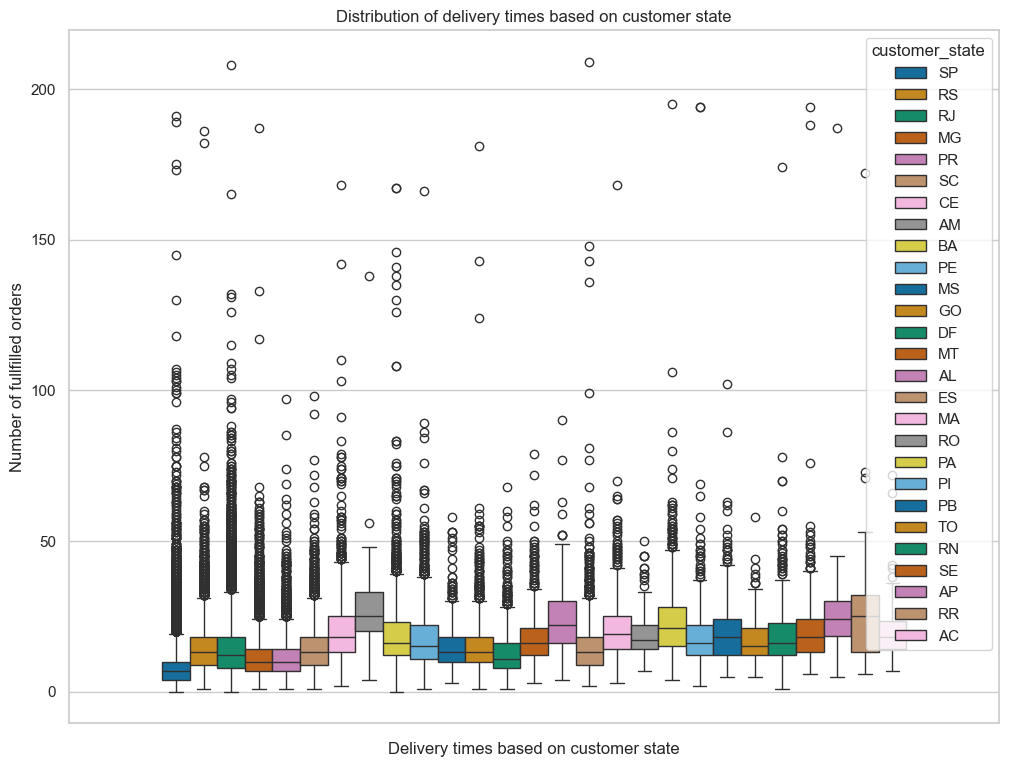

In [73]:
plt.figure(figsize=(12, 9))

axis = sns.boxplot(final_df.drop_duplicates(subset=["order_id"]), y="delivery_time_in_days", hue="customer_state", palette="colorblind")

plt.ylabel("Number of fullfilled orders")
plt.xlabel("Delivery times based on customer state")
plt.title("Distribution of delivery times based on customer state")
plt.show()

> Customers ordering from AM, AL, AP and RR states generally saw longer delivery times than their counterparts in other states.

### Which regions/categories have the highest delivery delays relative to estimated delivery dates?

In [74]:
final_df["order_delayed"] = final_df.apply(lambda x: x["order_delivered_customer_date"] > x["order_estimated_delivery_date"], axis=1)

In [75]:
delayed_orders = final_df[final_df["order_delayed"] == True]

delayed_orders_by_seller_state = delayed_orders.groupby(["seller_state"], as_index=False).size().sort_values("size", ascending=False)
delayed_orders_by_customer_state = delayed_orders.groupby(["customer_state"], as_index=False).size().sort_values("size", ascending=False)
delayed_orders_by_product_category = delayed_orders.groupby(["product_category_name_english"], as_index=False).size().sort_values("size", ascending=False)

In [76]:
delayed_orders.shape

(9068, 55)

In [77]:
delayed_orders_by_seller_state.head()

,seller_state,size
18,SP,6985
13,PR,559
7,MG,502
14,RJ,389
17,SC,237


In [78]:
delayed_orders_by_customer_state.head()

,customer_state,size
25,SP,2758
18,RJ,1936
10,MG,723
4,BA,543
22,RS,435


In [79]:
delayed_orders_by_seller_state.shape, delayed_orders_by_customer_state.shape

((19, 2), (27, 2))

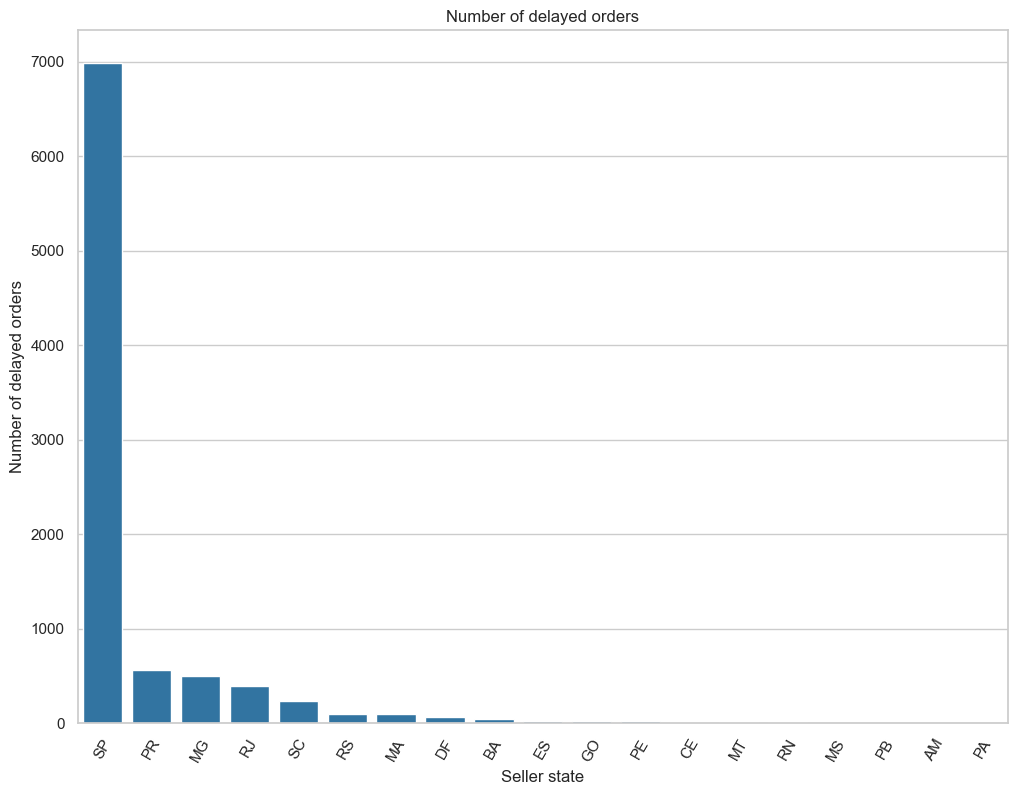

In [80]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(delayed_orders_by_seller_state, x="seller_state", y="size", color="tab:blue")

plt.ylabel("Number of delayed orders")
plt.xlabel("Seller state")
plt.title("Number of delayed orders")
plt.xticks(rotation=60)
plt.show();

> Sellers in SP state generally account for most of the delayed orders.

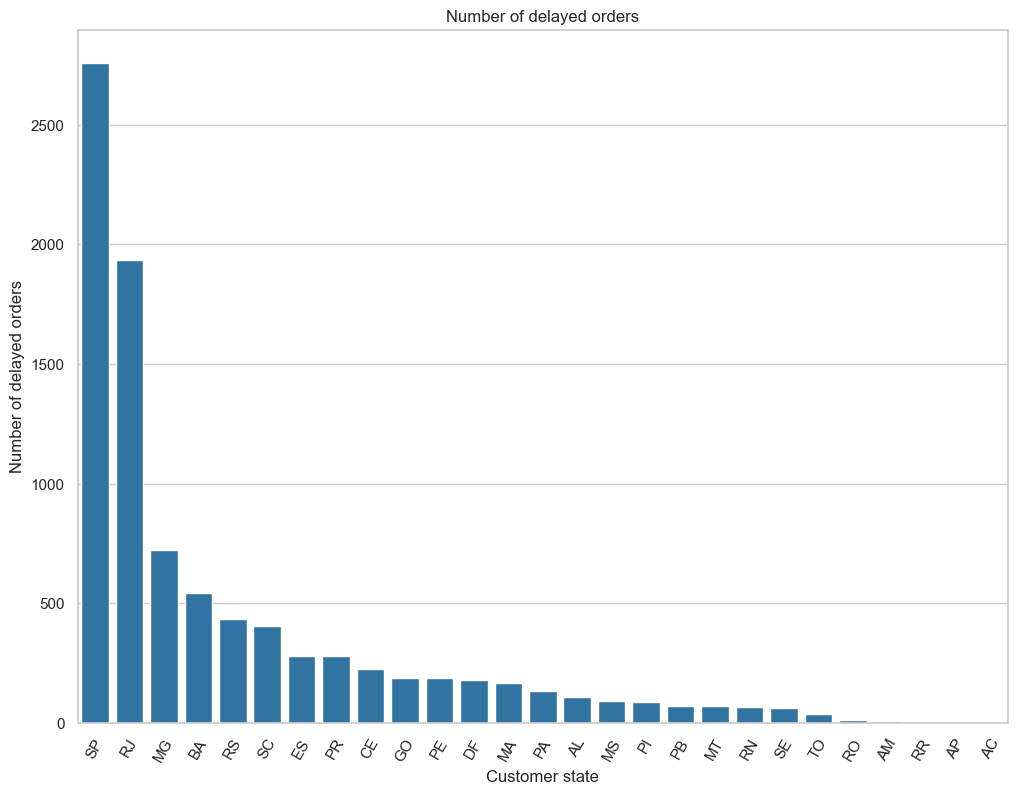

In [81]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(delayed_orders_by_customer_state, x="customer_state", y="size", color="tab:blue")

plt.ylabel("Number of delayed orders")
plt.xlabel("Customer state")
plt.title("Number of delayed orders")
plt.xticks(rotation=60)
plt.show();

> Customers in SP and RJ states witness more delayed orders than in any other state.

In [82]:
delayed_orders_from_sp = delayed_orders[delayed_orders["seller_state"] == "SP"]

delayed_orders_from_sp_by_customer_state = delayed_orders_from_sp.groupby(["customer_state"], as_index=False).size().sort_values("size", ascending=False)

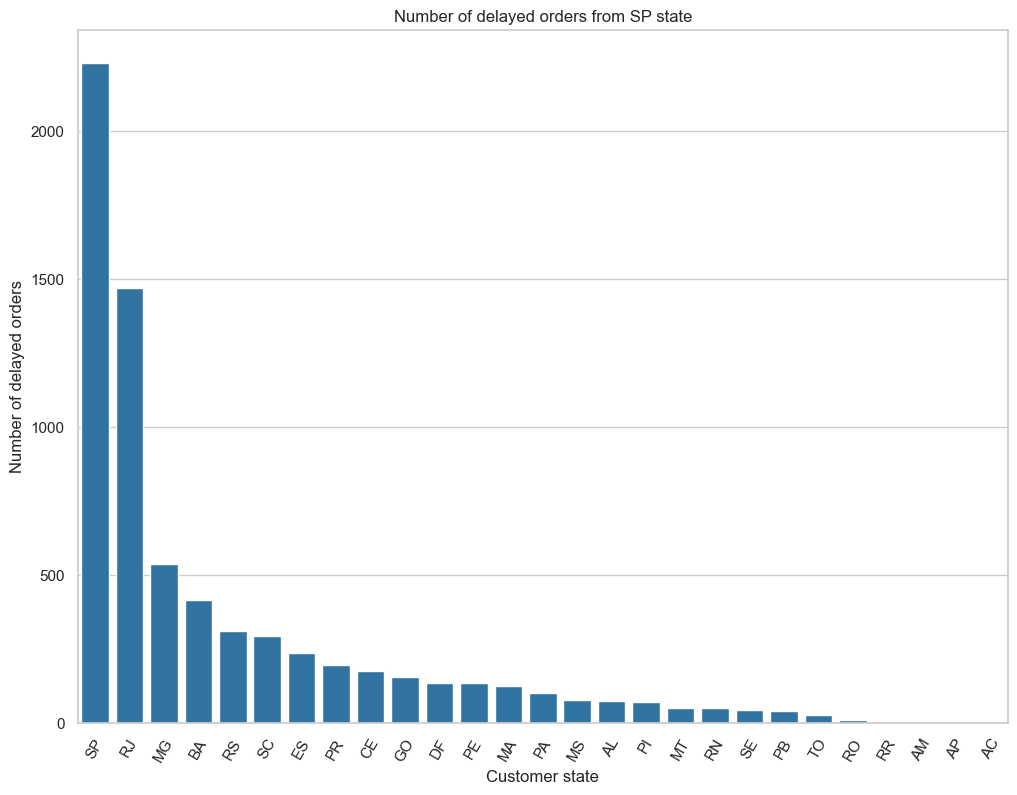

In [83]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(delayed_orders_from_sp_by_customer_state, x="customer_state", y="size", color="tab:blue")

plt.ylabel("Number of delayed orders")
plt.xlabel("Customer state")
plt.title("Number of delayed orders from SP state")
plt.xticks(rotation=60)
plt.show();

> Drilling down further to understand the destination of delayed orders from SP shows that most of the customers make their orders from SP itself. Being the most populous state in Brazil, it is expected that congestion and traffic would cause such delays. Similarly, RJ being the third most populous state whilst being one of the smallest (by size) explains the difficulty of sellers reaching their customers.

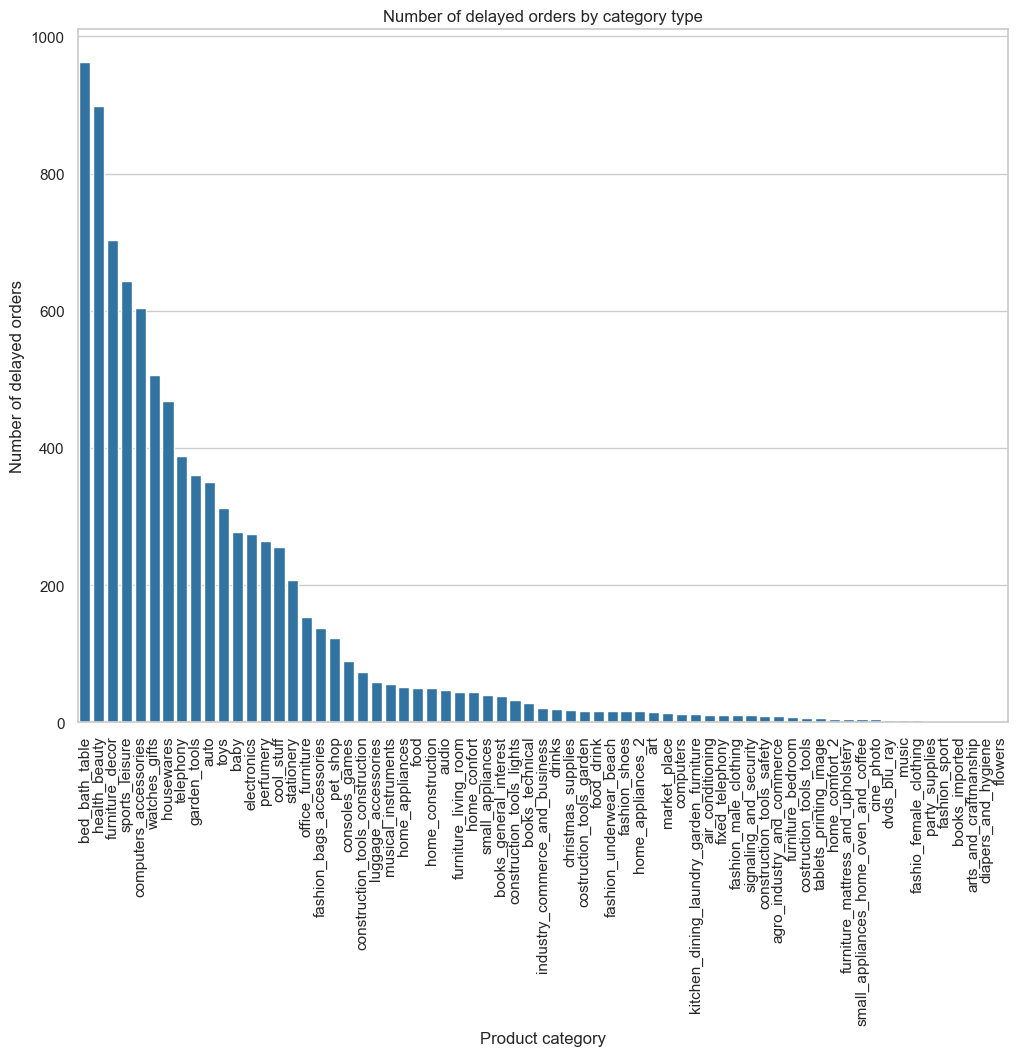

In [84]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(delayed_orders_by_product_category, x="product_category_name_english", y="size", color="tab:blue")

plt.ylabel("Number of delayed orders")
plt.xlabel("Product category")
plt.title("Number of delayed orders by category type")
plt.xticks(rotation=90)
plt.show();

> The most delayed category is bed_bath_table, followed by health_beauty and furniture decor. 

### How do review scores vary by delivery delay (on-time vs late)? 

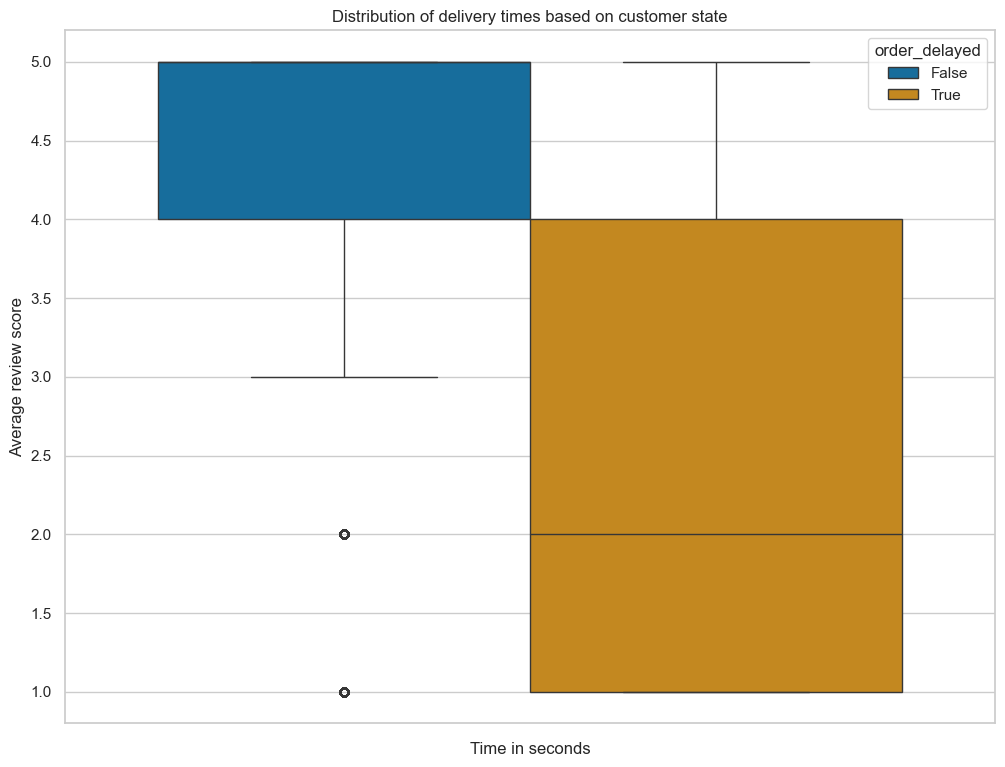

In [85]:
plt.figure(figsize=(12, 9))

axis = sns.boxplot(final_df, y="review_score", hue="order_delayed", palette="colorblind")

plt.ylabel("Average review score")
plt.xlabel("Time in seconds")
plt.title("Distribution of delivery times based on customer state")
plt.show()

> There is a clear difference between the distributions of review scores when delays are taken into account. On average, delayed deliveries are rated at 2.0 while orders delivered on time are rated at about 4.5. Most of the reviews for orders delivered on time range from 4.0 to 5.0. The reviews for delayed orders, on the other hand, range mostly from 1.0 to 4.0.

### Which product categories have the lowest average review scores and highest return-risk signals (e.g., low reviews + long delivery times)? 

In [86]:
final_df.groupby('product_category_name_english').agg(avg_review=('review_score','mean'), avg_delivery_time=('delivery_time_in_days', 'mean')).sort_values(['avg_review', 'avg_delivery_time'], ascending=([True, False])).head(10)

,avg_review,avg_delivery_time
product_category_name_english,,
security_and_services,2.500000,15.000000
diapers_and_hygiene,3.256410,10.243243
office_furniture,3.526791,20.505389
fashion_male_clothing,3.548611,12.724638
home_comfort_2,3.642857,13.806452
fixed_telephony,3.672862,12.324427
fashio_female_clothing,3.780000,11.369565
furniture_mattress_and_upholstery,3.804878,13.700000
audio,3.840849,12.854881


In [87]:
final_df.groupby('product_category_name_english').agg(avg_review=('review_score','mean'), avg_delivery_time=('delivery_time_in_days', 'mean')).sort_values(['avg_delivery_time', 'avg_review'], ascending=([False, True])).head(10)

,avg_review,avg_delivery_time
product_category_name_english,,
office_furniture,3.526791,20.505389
christmas_supplies,4.020270,15.282895
security_and_services,2.500000,15.000000
fashion_shoes,4.223443,14.809524
home_comfort_2,3.642857,13.806452
furniture_mattress_and_upholstery,3.804878,13.700000
furniture_living_room,3.913793,13.591603
garden_tools,4.023914,13.262946
home_appliances_2,4.212687,13.171103


### Which payment methods are most common and how do they relate to order value and order completion status? 

In [88]:
final_df["payment_type"].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', nan],
      dtype=object)

In [89]:
delayed_orders_by_payment_type = delayed_orders.groupby(["payment_type"], as_index=False).size().sort_values("size", ascending=False)

In [90]:
delayed_orders_by_payment_type

,payment_type,size
1,credit_card,6600
0,boleto,1934
3,voucher,394
2,debit_card,137


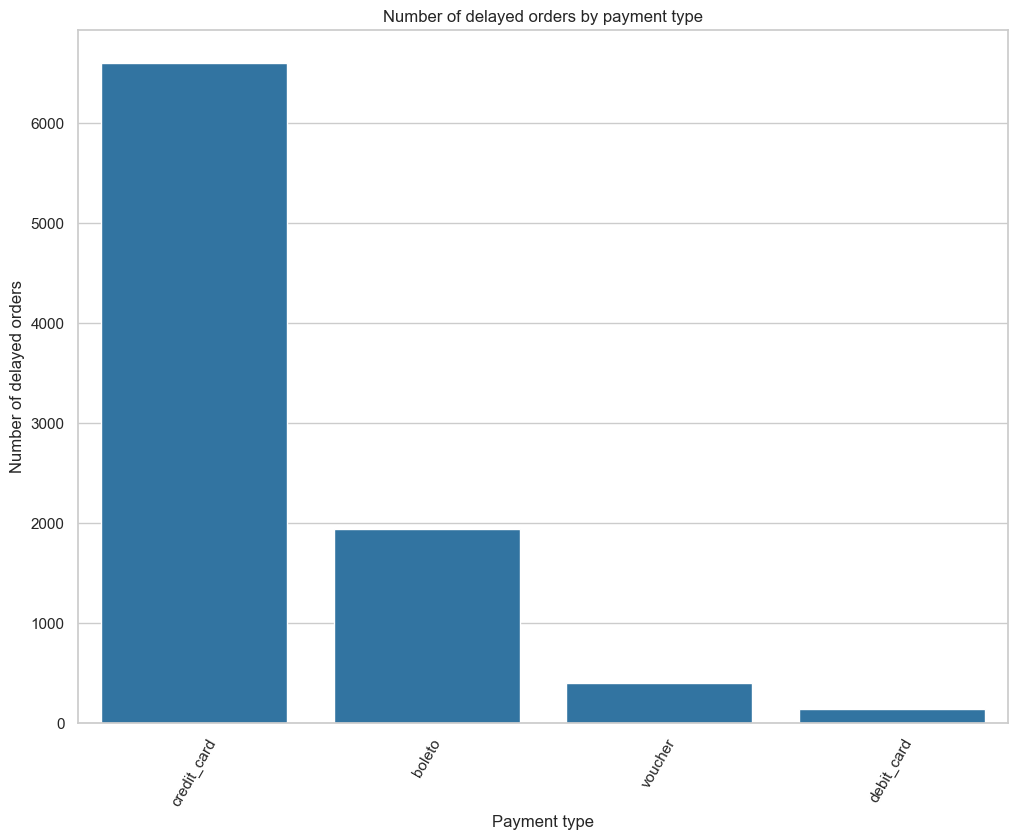

In [91]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(delayed_orders_by_payment_type, x="payment_type", y="size", color="tab:blue")

plt.ylabel("Number of delayed orders")
plt.xlabel("Payment type")
plt.title("Number of delayed orders by payment type")
plt.xticks(rotation=60)
plt.show();

> Most of the customers whose orders were delayed paid via credit card.

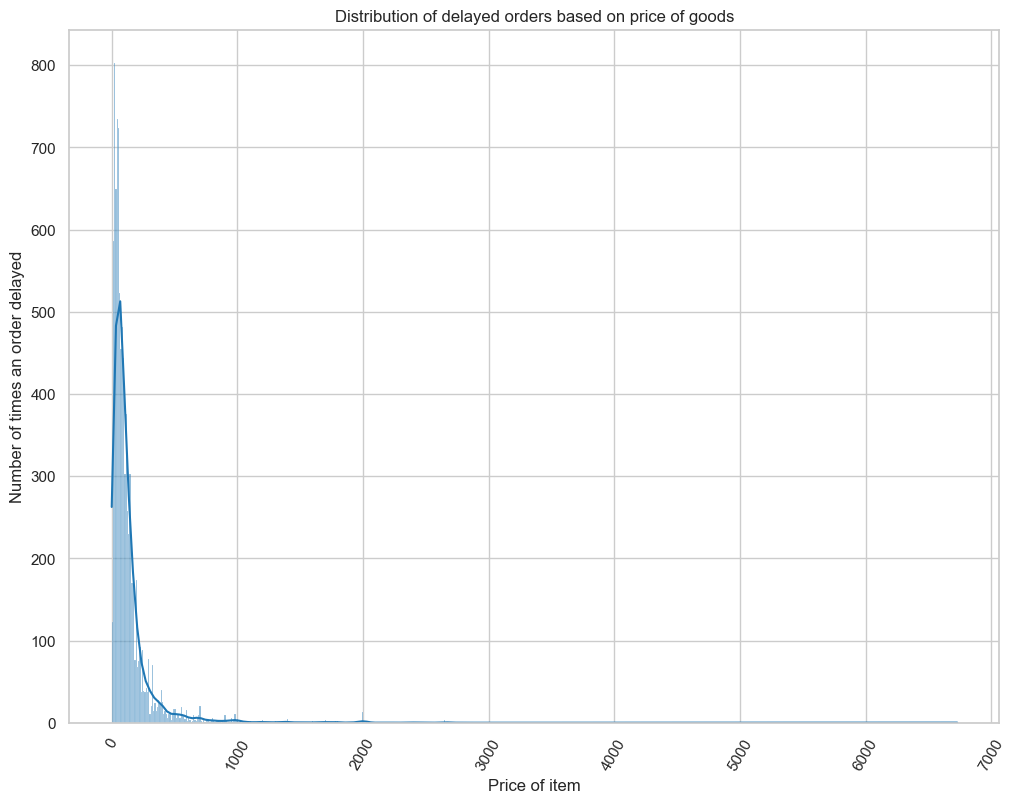

In [92]:
plt.figure(figsize=(12, 9));

ax = sns.histplot(delayed_orders, x="price", kde=True, color="tab:blue")

plt.ylabel("Number of times an order delayed")
plt.xlabel("Price of item")
plt.title("Distribution of delayed orders based on price of goods")
plt.xticks(rotation=60)
plt.show();

> The distribution shows that higher-priced items were delayed less often than lower-priced items.

## Additional Questions

### Which sellers contribute most to late deliveries (top 10 sellers by delay rate)?

In [93]:
delayed_orders.groupby(["seller_id", "seller_state"], as_index=False).size().sort_values(by="size", ascending=False).head(10)

,seller_id,seller_state,size
401,4a3ca9315b744ce9f8e9374361493884,SP,224
192,1f50f920176fa81dab994f9023523100,SP,198
395,4869f7a5dfa277a7dca6462dcf3b52b2,SP,145
689,7c67e1448b00f6e969d365cea6b010ab,SP,135
98,1025f0e2d44d7041d6cf58b6550e0bfa,SP,133
553,6560211a19b47992c3666cc44a7e94c0,SP,130
1268,ea8482cd71df3c1969d7b9473ff13abc,SP,126
826,955fee9216a65b617aa5c0531780ce60,SP,122
1187,da8622b14eb17ae2831f4ac5b9dab84a,SP,115
1105,cc419e0650a3c5ba77189a1882b7556a,SP,112


> All the top-ten sellers whose orders delayed operate from SP state.

### Which sellers contribute most to low review scores (top 10 sellers by avg review score and review volume)?

In [94]:
final_df.groupby(["seller_id", "seller_state"], as_index=False)["review_score"].mean().sort_values(by="review_score", ascending=True).head(10)

,seller_id,seller_state,review_score
1057,56a8b450e802502ba53a9885ee38e29f,SP,1.0
1901,9c3a1c416c765687bc79a04113269929,MG,1.0
1905,9c57bc60cfad5ee62d35d3f1ce4593a1,PR,1.0
689,3a52d63a8f9daf5a28f3626d7eb9bd28,SP,1.0
1928,9e17b9d64683aebcbb9ee362d06463b4,SP,1.0
376,1fddcb7b326905d3ad5efe82187db347,SP,1.0
940,4e42581f08e8cfc7c090f930bac4552a,SP,1.0
2745,e46bc031f2c5bae4ccb40bb90712e9b4,SP,1.0
373,1fa2d3def6adfa70e58c276bb64fe5bb,SP,1.0
2778,e628d4a53c109f09ca88098338b3a3f5,MG,1.0


In [95]:
low_review_score_contributors = final_df.groupby('seller_id').agg(avg_review=('review_score','mean'), review_volume=('review_comment_message', 'count')).sort_values(['avg_review', 'review_volume'], ascending=([True, False]))

In [96]:
low_review_score_contributors.head(10)

,avg_review,review_volume
seller_id,,
010da0602d7774602cd1b3f5fb7b709e,1.0,5
3bfad056cf05c00dabe2f895925d83b1,1.0,5
90d4125885ab6c86e8820a722be71974,1.0,4
fc6295add6f51a0936407ead70c1001d,1.0,4
15aec03fe4cf30dfa574cf550f5ff5ff,1.0,3
17adeba047385fb0c67d8e90b4296d21,1.0,3
37ceb404da208418c9032f0674e57804,1.0,3
42d4b7e70819438f5ada61c965e92d7e,1.0,3
4e42581f08e8cfc7c090f930bac4552a,1.0,3


### Do higher shipping costs correlate with faster delivery, slower delivery, or no pattern?

In [97]:
final_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_date,order_day,order_month,order_year,order_quarter,order_year_month,order_year_quarter,delivery_time_in_days,delivery_time_in_seconds,order_delayed
71004,65709b9620e3ef6f575918b8348a8ece,a2207623637c05c6e3d75bc34256c3f8,delivered,2018-01-09 09:51:35,2018-01-09 10:09:46,2018-01-15 20:18:34,2018-01-17 19:46:26,2018-02-07,1.0,credit_card,10.0,416.59,c4cab6d06a9bca48ce665aec3fa340d4,2.0,NaN,"Comprei 4 toners (magenta, amarelo, ciano e pr...",2018-01-18,2018-01-22 16:33:04,2.0,1dc7685f4fdb9622d84ae2ec658d5bbf,9c0e69c7bf2619675bbadf47b43f655a,2018-01-15 10:09:46,199.0,10.86,informatica_acessorios,54.0,292.0,1.0,1025.0,27.0,13.0,19.0,computers_accessories,12230,sao jose dos campos,SP,3660e33bc132658a08c234cc82e6d0cc,4578,sao paulo,SP,4578.0,-23.606158,-46.697039,são paulo,SP,2018-01-09,1,1,2018,1,2018-M01,2018-Q01,8.0,726891.0,False
87067,16244699615d84f02399e1b0e88468b2,da94b6d4f10776be847cd1869a2c677d,delivered,2017-04-01 17:11:03,2017-04-01 17:22:42,2017-04-07 13:22:59,2017-04-19 14:45:08,2017-04-26,1.0,credit_card,3.0,194.81,abbf44e07fddad1fb226bd42f62af0ff,4.0,NaN,"Tô neia linda e muito eficiente, super recomen...",2017-04-20,2017-04-20 21:10:19,1.0,908cc1d3a4c57d9d802fc3872e396395,df560393f3a51e74553ab94004ba5c87,2017-04-06 17:22:42,175.3,19.51,moveis_decoracao,45.0,225.0,1.0,2200.0,35.0,35.0,25.0,furniture_decor,87900,loanda,PR,5a4d11d56c3c62e630300b2e98a4c195,11750,peruibe,SP,11750.0,-24.309429,-46.991091,peruibe,SP,2017-04-01,5,4,2017,2,2017-M04,2017-Q02,17.0,1546445.0,False
101913,7a70b827ebc6ab85bd4e28739619bb2d,cad3d3fc70d214ca82f4b5d6dfb279f2,delivered,2018-08-08 17:41:10,2018-08-09 17:50:09,2018-08-10 12:33:00,2018-08-18 11:24:19,2018-08-29,1.0,credit_card,10.0,650.13,c3a64ac000441a52b242733bb3f60353,5.0,NaN,NaN,2018-08-19,2018-08-22 17:04:48,3.0,39b146e69c32ffe0a469e95a71585843,0b35c634521043bf4b47e21547b99ab5,2018-08-15 17:50:09,99.9,56.10,construcao_ferramentas_construcao,58.0,339.0,1.0,2400.0,22.0,8.0,22.0,construction_tools_construction,84530,teixeira soares,PR,71fc6a8faee5a414d80feac6ea0e7976,8331,sao paulo,SP,8331.0,-23.609398,-46.471150,sao paulo,SP,2018-08-08,2,8,2018,3,2018-M08,2018-Q03,9.0,841389.0,False
118035,100ad9dbc9d9b325495758270807e3aa,c6afc87168ed229907f48e0b57f79ff4,delivered,2018-02-16 14:01:10,2018-02-16 14:15:25,2018-02-16 22:58:58,2018-03-14 20:32:49,2018-03-15,1.0,credit_card,1.0,167.62,108288a3fede1ba1a6e5e499eaf769ee,3.0,NaN,NaN,2018-03-15,2018-03-16 18:15:13,1.0,bf5fe03d1ac5be6407a279b3681992ed,3dc69bf2c42f0568a5c4791ec3fd3745,2018-02-22 13:15:25,150.0,17.62,beleza_saude,40.0,1247.0,1.0,700.0,22.0,22.0,22.0,health_beauty,2880,sao paulo,SP,728c6a3b4c03e58b40127480f572dfc5,78075,cuiaba,MT,78075.0,-15.610516,-56.031709,cuiaba,MT,2018-02-16,4,2,2018,1,2018-M02,2018-Q01,26.0,2269899.0,False
107,e3d83da524afead5265900f2cd40d592,f145cc75412500f2dbe71a57c2d4dc9f,delivered,2018-08-25 11:31:22,2018-08-25 11:45:19,2018-08-27 14:36:00,2018-08-29 20:17:53,2018-09-06,1.0,credit_card,2.0,53.12,18da836f6b77df0a52eee004194d5d3d,5.0,Super recomendaddo,gostei muito de comprar estes produtos,2018-08-30,2018-09-03 21:30:27,1.0,b453858c312812141a610b1f511f609e,289cdb325fb7e7f891c38608bf9e0962,2018

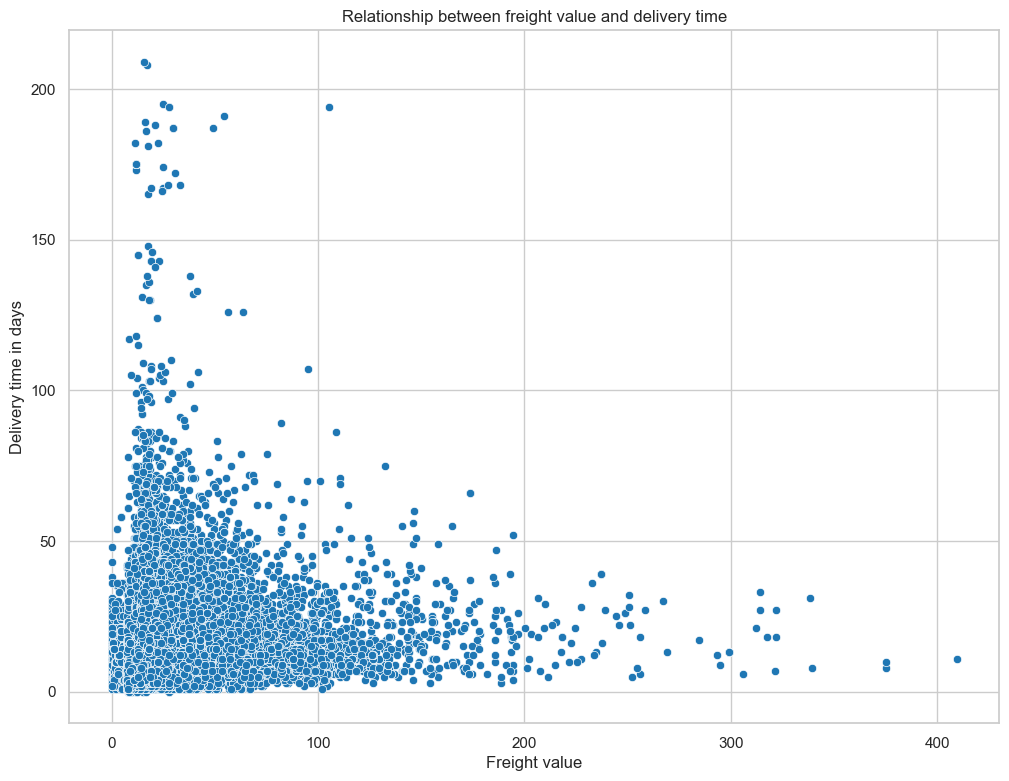

In [98]:
plt.figure(figsize=(12, 9));

ax = sns.scatterplot(final_df, x="freight_value", y="delivery_time_in_days", color="tab:blue")

plt.xlabel("Freight value")
plt.ylabel("Delivery time in days")
plt.title("Relationship between freight value and delivery time")
plt.show();

> There does not appear to be any correlation between the freight value and the delivery time.

### What is the geographic distribution of orders (state/city heatmap), and where are the top revenue regions? 

In [99]:
geolocation_df = final_df.groupby(["geolocation_lat", "geolocation_lng"]).size().reset_index(name="count")

In [100]:
final_df_geodataframe = gpd.GeoDataFrame(
    geolocation_df, geometry=gpd.points_from_xy(geolocation_df.geolocation_lng, geolocation_df.geolocation_lat), crs="EPSG:4326"
)

geo_df = gpd.GeoDataFrame(
    final_df, geometry=gpd.points_from_xy(final_df.geolocation_lng, final_df.geolocation_lat), crs="EPSG:4326"
)

In [101]:
world = gpd.read_file(get_path("naturalearth.land"))

<AxesSubplot: >

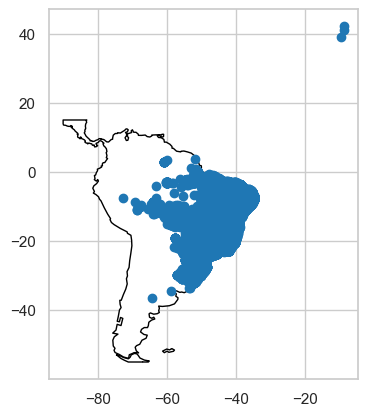

In [102]:
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

final_df_geodataframe.plot(ax=ax, color="tab:blue")

In [103]:
final_df_geodataframe.head()

,geolocation_lat,geolocation_lng,count,geometry
0,-36.605374,-64.283946,12,POINT (-64.28395 -36.60537)
1,-34.586422,-58.732101,1,POINT (-58.7321 -34.58642)
2,-33.691423,-53.480161,5,POINT (-53.48016 -33.69142)
3,-33.525601,-53.366420,15,POINT (-53.36642 -33.5256)
4,-32.563952,-53.384720,10,POINT (-53.38472 -32.56395)


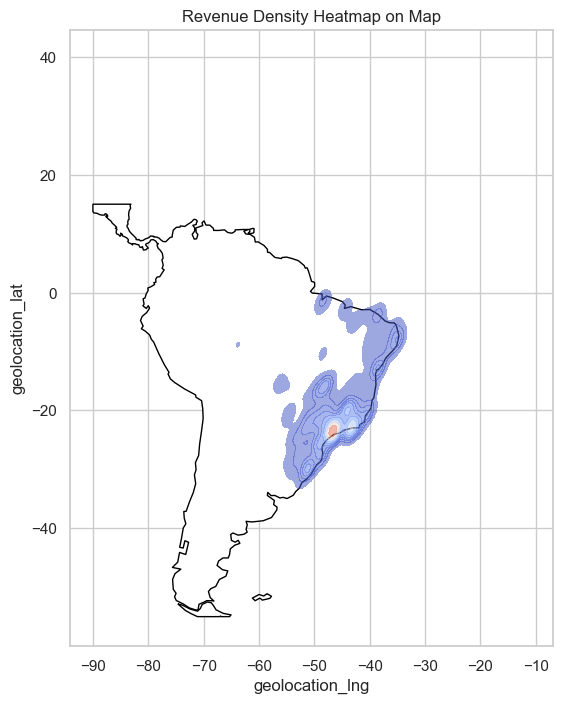

In [104]:
geo_df = final_df[["geolocation_lat", "geolocation_lng", 'order_id','price']]
geo_df["geometry"] = gpd.points_from_xy(
    geo_df["geolocation_lng"], geo_df["geolocation_lat"]
)
geo_gdf = gpd.GeoDataFrame(geo_df, geometry="geometry", crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(10, 8))
world.clip([-90, -55, -25, 15]).plot(ax=ax, color="white", edgecolor="black")

sns.kdeplot(
    x=geo_df["geolocation_lng"],
    y=geo_df["geolocation_lat"],
    weights=geo_df["price"],  
    cmap="coolwarm",
    fill=True,
    alpha=0.5,
    ax=ax
)

plt.title("Revenue Density Heatmap on Map")
plt.show()

### What are the top categories by revenue, and are they also top categories by satisfaction?

In [105]:
final_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_date,order_day,order_month,order_year,order_quarter,order_year_month,order_year_quarter,delivery_time_in_days,delivery_time_in_seconds,order_delayed
53738,e847ea44928b27b43984d79532b7ae20,66cdaaa835a514eaafde24585709de8b,delivered,2017-09-20 18:00:58,2017-09-20 18:10:21,2017-09-21 16:42:20,2017-09-25 13:30:03,2017-10-11,1.0,credit_card,2.0,643.66,ffac0dece7c5ac3c9ec3d7362f324ad2,5.0,NaN,ENTREGA MUITO RAPIDA,2017-09-26,2017-09-26 18:58:09,1.0,1c6b8ed36259a0971b3fd58692b60f9c,48162d548f5b1b11b9d29d1e01f75a61,2017-09-26 18:10:21,592.80,50.86,ferramentas_jardim,60.0,918.0,1.0,2050.0,50.0,50.0,50.0,garden_tools,13403,piracicaba,SP,2b92d3424e4753507758b17ea205e18d,4261,sao paulo,SP,4261.0,-23.581433,-46.611720,sao paulo,SP,2017-09-20,2,9,2017,3,2017-M09,2017-Q03,4.0,415745.0,False
3657,329465dad46fffab333860e92e7ac984,2591b8425f1f3f363d644917fbc238db,delivered,2017-01-27 22:14:53,2017-01-28 10:30:56,2017-02-03 13:54:57,2017-02-14 13:15:33,2017-03-13,1.0,credit_card,3.0,224.98,de4bf6b43e5a98bc4be48bc501464792,1.0,NaN,NaN,2017-02-15,2017-02-15 23:47:17,1.0,92c1eb75a887a500d9689fbad65e27e3,7c67e1448b00f6e969d365cea6b010ab,2017-02-03 22:14:53,199.98,25.00,moveis_escritorio,41.0,1205.0,1.0,17150.0,58.0,61.0,24.0,office_furniture,8577,itaquaquecetuba,SP,b0e456c406192d77c8ff45ba89c81d61,21820,rio de janeiro,RJ,21820.0,-22.881087,-43.471003,rio de janeiro,RJ,2017-01-27,4,1,2017,1,2017-M01,2017-Q01,17.0,1522840.0,False
113497,30244fa670103f1654f92667d446878f,d36f42791492c5b4404bfaf182d4dfd9,delivered,2018-05-01 12:22:52,2018-05-01 12:35:21,2018-05-02 12:10:00,2018-05-07 14:17:28,2018-05-29,1.0,credit_card,2.0,122.29,020ed8f7741bc693d6a40a71cc82a24e,5.0,excelente fornecedor,Entregue em em boa embalagem e dentro do prazo!,2018-05-08,2018-05-10 21:44:43,1.0,9c1e3896aec5f6c59577d451ea3bb4c6,141440cad9341e553f8401c574a2aa38,2018-05-07 12:35:21,102.60,19.69,bebidas,23.0,852.0,1.0,425.0,28.0,16.0,16.0,drinks,85200,pitanga,PR,65859c1624b7642ec285b4a71efd9506,12245,sao jose dos campos,SP,12245.0,-23.199328,-45.886794,são josé dos campos,SP,2018-05-01,1,5,2018,2,2018-M05,2018-Q02,6.0,525276.0,False
55662,fb34957b24cfaa3c67835b67097b45e6,062d526eabc36e995e3a9ce353894fcb,delivered,2018-03-04 19:52:36,2018-03-04 20:09:29,2018-03-07 21:24:57,2018-04-18 19:35:46,2018-04-05,1.0,credit_card,2.0,102.84,b3ef4767af71b2cdf7a6ebc529d8d300,1.0,NaN,"Meu produto não chegou, se não chegar em 3 dia...",2018-04-07,2018-04-15 03:12:58,1.0,cec09725da5ed01471d9a505e7389d37,4d6d651bd7684af3fffabd5f08d12e5a,2018-03-08 20:09:29,69.90,32.94,esporte_lazer,52.0,1197.0,1.0,2500.0,20.0,11.0,11.0,sports_leisure,17209,jau,SP,039024d7c7249fe937d2e306af33e446,67013,ananindeua,PA,67013.0,-1.400029,-48.429567,ananindeua,PA,2018-03-04,6,3,2018,1,2018-M03,2018-Q01,44.0,3886990.0,True
37410,1f9835b3f1bac0471bfe78932aac63ff,e4b3b5a0f4830ef7a88e31fee4c7eceb,delivered,2017-11-01 15:33:06,2017-11-01 16:31:05,2017-11-04 00:31:31,2017-11-07 14:14:47,2017-11-14,1.0,credit_card,4.0,93.27,6c6a39b26008d3f6c13709c83780e6f6,5.0,NaN,NaN,2017-11-08,2017-11-08 17:34:07,1.0,f98dbc219c0bcd7fb37420dff826912f,2e1c9f22be269ef4643f826c9e650a52,2017-11-08 15:50:23,81.49,11.78,beleza_saude,58.0,1

In [106]:
revenue_by_category = final_df.groupby("product_category_name_english", as_index=False)["price"].sum()

revenue_by_category = revenue_by_category.sort_values("price", ascending=False).reset_index()


review_score_by_category = final_df.groupby("product_category_name_english", as_index=False)["review_score"].mean()

review_score_by_category = review_score_by_category.sort_values("review_score", ascending=False).reset_index()

In [107]:
review_score_by_category.head()

,index,product_category_name_english,review_score
0,11,cds_dvds_musicals,4.642857
1,29,fashion_childrens_clothes,4.500000
2,8,books_general_interest,4.438503
3,9,books_imported,4.419355
4,35,flowers,4.419355


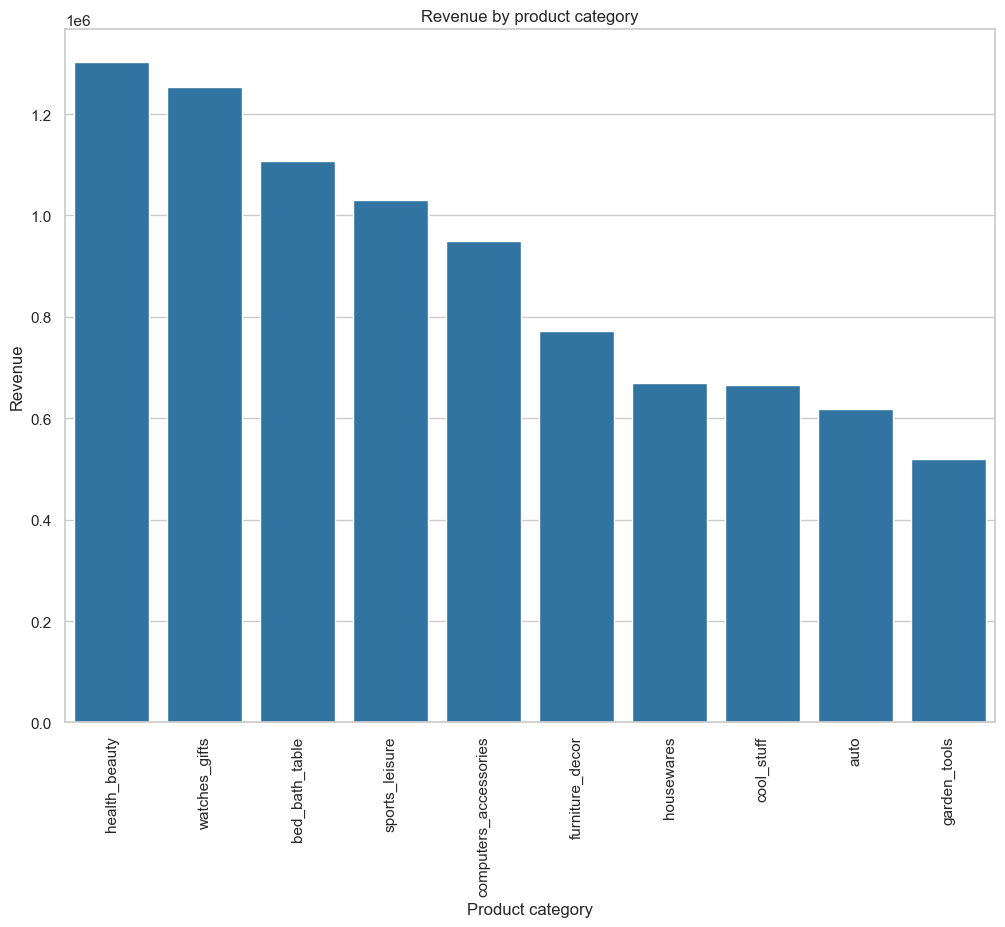

In [108]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(revenue_by_category.head(10), x="product_category_name_english", y="price", color="tab:blue")

plt.ylabel("Revenue")
plt.xlabel("Product category")
plt.title("Revenue by product category")
plt.xticks(rotation=90)
plt.show();

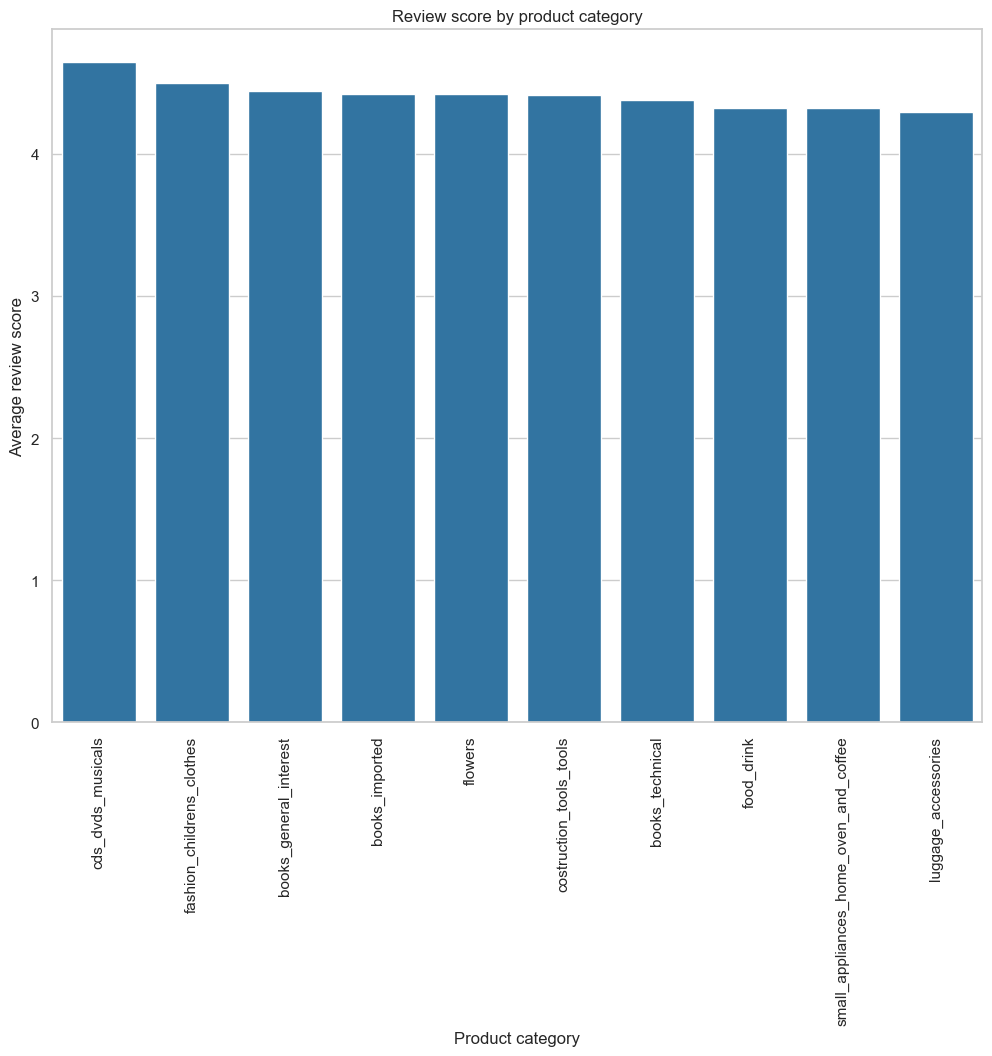

In [109]:
plt.figure(figsize=(12, 9));

ax = sns.barplot(review_score_by_category.head(10), x="product_category_name_english", y="review_score", color="tab:blue")

plt.ylabel("Average review score")
plt.xlabel("Product category")
plt.title("Review score by product category")
plt.xticks(rotation=90)
plt.show();

In [110]:
final_df["order_id"].nunique()

98666

In [111]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_date,order_day,order_month,order_year,order_quarter,order_year_month,order_year_quarter,delivery_time_in_days,delivery_time_in_seconds,order_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2017-10-02,0,10,2017,4,2017-M10,2017-Q04,8.0,728920.0,False
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2017-10-02,0,10,2017,4,2017-M10,2017-Q04,8.0,728920.0,False
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2017-10-02,0,10,2017,4,2017-M10,2017-Q04,8.0,728920.0,False
3,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,1.0,credit_card,1.0,83.69,b8238c6515192f8129081e17dc57d169,5.0,NaN,"custo beneficio, simples de usar e rápido",2017-08-17,2017-08-21 12:43:27,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,baby,9350,maua,SP,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,8577.0,-23.482623,-46.374490,itaquaquecetuba,SP,2017-08-10,3,8,2017,3,2017-M08,2017-Q03,6.0,538061.0,False
4,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,2017-07-12 14:11:58,2017-07-12 14:30:18,2017-07-13 12:47:05,2017-07-18 16:24:42,2017-07-25,1.0,credit_card,2.0,52.77,fa5bf792d42ed25f80c54d18aeaa83de,4.0,NaN,NaN,2017-07-19,2017-07-24 13:59:59,1.0,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-18 14:30:18,44.99,7.78,cool_stuff,58.0,537.0,2.0,1850.0,34.0,5.0,34.0,cool_stuff,9

In [112]:
delayed_orders["delay_in_days"] = (delayed_orders["order_delivered_customer_date"] - delayed_orders["order_estimated_delivery_date"]).dt.days
delayed_orders["delay_in_seconds"] = delayed_orders.apply(lambda x: x["delay_in_days"]*86400 + (x["order_delivered_customer_date"] - x["order_purchase_timestamp"]).seconds, axis=1)

In [113]:
order_items = delayed_orders.groupby(["order_id", "delay_in_days"]).size().reset_index(name="count")

In [114]:
order_items.sort_values("count", ascending=False).head()

,order_id,delay_in_days,count
3973,8272b63d03f5f79c56e9e4120aec44ef,3,21
1094,242bcea719638feb8c102d38e67a4977,4,8
1486,30b66faf9517facb67ba9b710f0b9628,0,7
4633,985dbac2172bbf6b32bcca35da50d7a0,17,7
5196,aa9113495d5498b01ea4a235c64f2849,0,7


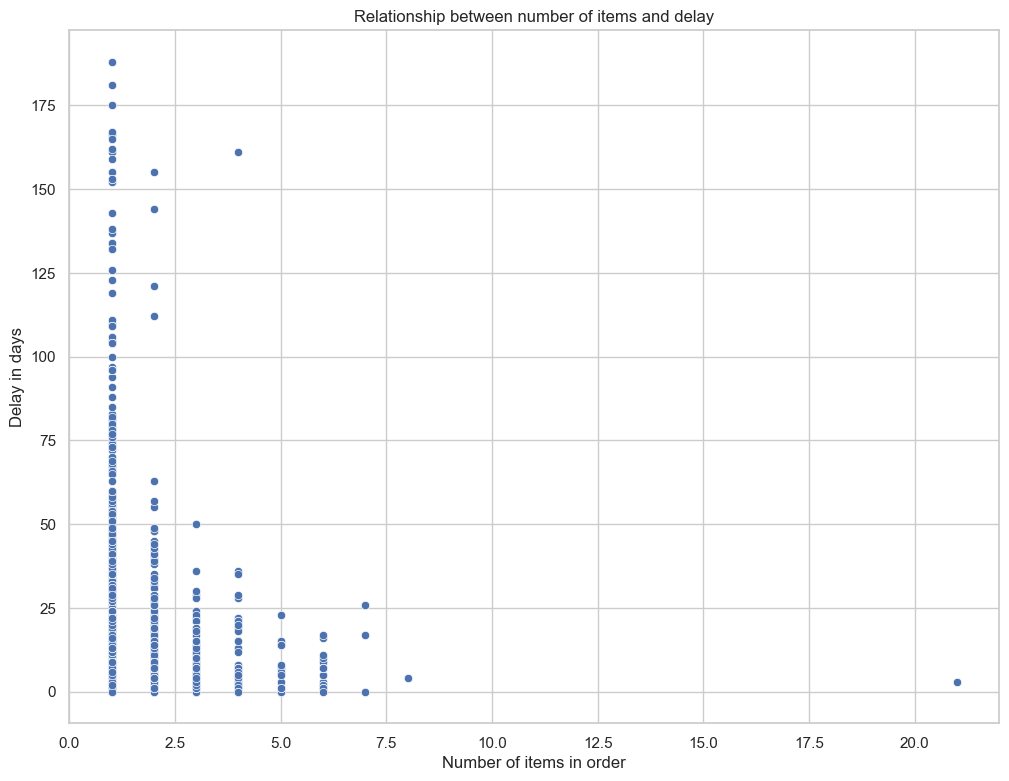

In [115]:
plt.figure(figsize=(12, 9));

ax = sns.scatterplot(order_items, y="delay_in_days", x="count")

plt.ylabel("Delay in days")
plt.xlabel("Number of items in order")
plt.title("Relationship between number of items and delay")
plt.show();